# Binary Classification

In [396]:
import numpy as np
import scipy
import scipy.stats as st
import matplotlib.pyplot as plt

Another class of supervised machine learning task is called classification. Let's start with a simpler case of binary classification. We enumerate two classes as 1 and -1. We will find the decision boundary function from labelled datapoints. $F(X) = W^TX$ <br>


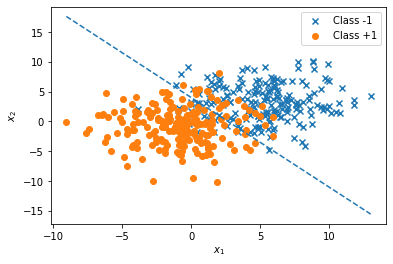

In [573]:
N = 400
class1_x1 = st.norm(5, 3).rvs(N//2)
class1_x2 = st.norm(3, 3).rvs(N//2)
class2_x1 = st.norm(-1, 3).rvs(N//2)
class2_x2 = st.norm(-1, 3).rvs(N//2)

plt.scatter(class1_x1, class1_x2, marker='x', label='Class -1')
plt.scatter(class2_x1, class2_x2, marker='o', label='Class +1')

# Line orthogonal to the mean of the two classes. 
plt.plot(np.linspace(np.min(class2_x1), np.max(class1_x1), 100),np.linspace(np.min(class2_x1), np.max(class1_x1), 100)*-1.5 + 4, '--')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()


Let's organize the data into a form more consistent with our previous discussions on [Linear Regression](./Linear%20Regression.ipynb). 

In [541]:
x1 = np.append(class1_x1, class2_x1)
x2 = np.append(class1_x2, class2_x2)
X = np.stack((x1, x2, np.ones(N)))
Y = np.ones(N)
Y[N//2:]*=-1 # Second half of the datapoints are in the class -1

First we observe the performance of linear regression in a classification task, and compare it to two new models that we'll discuss today: logistic regression and support vector machine (SVM). 

Text(0, 0.5, 'Loss')

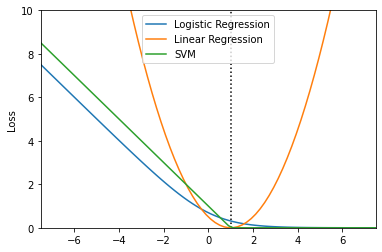

In [574]:
# Setting up the x-axis
Fx = np.linspace(-10, 10, 100)
y_i = -1

# Plotting the losses
loss = np.log(1+np.exp(-y_i*Fx))
plt.plot(y_i*Fx, loss, label='Logistic Regression')
loss = 0.5*(1-y_i*Fx)**2
plt.plot(y_i*Fx, loss, label='Linear Regression')
loss = np.clip(1-y_i*Fx, 0, np.inf)
plt.plot(y_i*Fx, loss, label='SVM')

plt.xlim(-7.5, 7.5)
plt.ylim(0, 10)
plt.vlines(1, 0, 20, linestyles='dotted')
plt.legend()
plt.ylabel('Loss')

In [ ]:
So let's take a look at Logistic Regression, whose loss, as plotted above, has a desirable gradient flow towards the correct answer. 

## Logistic Regression
Logistic Regression is based on the idea that each datapoint has an independent and identical probability distribution of belonging in one class or another. The probability distribution that models this is the logistic function (also called Sigmoid function). More formally, <br>
$p(y^{(i)} = 1 | x^{(i)}) = \frac{1}{1+\text{exp}(-w^T\phi(x^{(i)}))} \\
  p(y^{(i)} = -1 | x^{(i)}) = 1 - p(y^{(i)} = 1 | x^{(i)}) = \frac{1}{1+\text{exp}(w^T\phi(x^{(i)}))}$ <br>
Therefore, combining them together, <br>
$p(y^{(i)} | x^{(i)}) = \frac{1}{1+\text{exp}(-y^{(i)}w^T\phi(x^{(i)}))}$ <br>
Notice that we enumerate the states to be 1 and -1, for the convenience of being able to write the probability distribution as above. 

Text(0.5, 1.0, 'Logistic function (Sigmoid)')

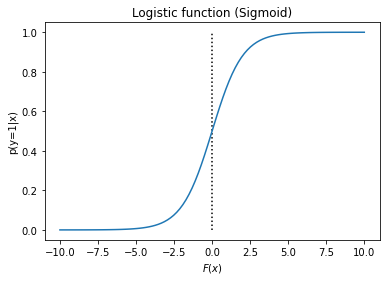

In [575]:
Fx = np.linspace(-10, 10, 100)
p = 1/(1+np.exp(-x))
plt.plot(x, p)
plt.vlines(0, 0, 1, linestyles='dotted')
plt.xlabel("$F(x)$")
plt.ylabel("p(y=1|x)")
plt.title("Logistic function (Sigmoid)")

Assuming independent identical distribution of probability for each dataset, we want to maximize the likelihood of classification probability by multiplying the probabilities. 
$$ loss = \max \prod_i p(y^{(i)}|x^{(i)})$$
We apply logarithmic function, which is a monatonic function, to allow adding the terms for each datapoint. 
$$ \begin{align*}
    L  &= \max \sum_i \log(p(y^{(i)}|x^{(i)}) \\
          &= \max \sum_i \log\left( \frac{1}{1+\text{exp}(-y^{(i)}w^T\phi(x^{(i)}))}\right) \\
          &= \min \sum_i \log\left( 1+\text{exp}(-y^{(i)}w^T\phi(x^{(i)}))\right)
   \end{align*}
$$
To find the global minimum, we first take the derivative with respect to w, 
$$  \begin{align*}
    \frac{\partial L}{\partial w} &=\sum_i \frac{1}{1+\text{exp}(-y^{(i)}w^T\phi(x^{(i)}))} \cdot \frac{\partial }{\partial w} \left( 1+\text{exp}(-y^{(i)}w^T\phi(x^{(i)}))\right) \\
                                  &=\sum_i \frac{1}{1+\text{exp}(-y^{(i)}w^T\phi(x^{(i)}))} \cdot \frac{\partial }{\partial w} \left( \text{exp}(-y^{(i)}w^T\phi(x^{(i)}))\right) \\
                                  &=\sum_i \frac{1}{1+\text{exp}(-y^{(i)}w^T\phi(x^{(i)}))} \cdot \text{exp}(-y^{(i)}w^T\phi(x^{(i)})) \cdot \frac{\partial}{\partial w} \left(-y^{(i)}w^T\phi(x^{(i)})\right) \\
                                  &=\sum_i \frac{1}{1+\text{exp}(-y^{(i)}w^T\phi(x^{(i)}))} \cdot \text{exp}(-y^{(i)}w^T\phi(x^{(i)})) \cdot (-y^{(i)}) \cdot \phi(x^{(i)}) \\
                                  &=\sum_i \frac{-y^{(i)} \text{exp}(-y^{(i)}w^T\phi(x^{(i)}))}{1+\text{exp}(-y^{(i)}w^T\phi(x^{(i)}))} \cdot \phi(x^{(i)})
  \end{align*} $$

Note that if we set  $\frac{\partial L}{\partial w} = 0$, there exists no closed form solution for an optimal $w$ as we did in linear regression. We have to numerically find the global minimum by optimizing the loss function with respect to w. We use gradient descent below. A more detailed discussion of optimization can be found here: [Optimization](./Optimization.ipynb)

[ 0.70164444  0.49937199 -1.76233744]


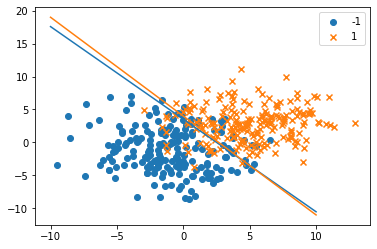

In [545]:
# Initialize the model parameters
W = np.random.randn(3,)
# Initialize the learning rate (gradient step)
alpha = 0.01

# Optimize with gradient descent
for i in range(10000):
    tmp = np.exp(-Y*(W.T@X)) # reoccuring term named for convenience
    loss = np.mean(np.log(1+tmp))
    gradient = np.mean((-Y*tmp)/(1+tmp)*X, axis=1) # gradient is a vector, not scalar
    W = W - alpha*gradient # gradient descent
    #print("\r" + str(loss))
    
# Optimized model parameters after learning
W_star = W

# Visualizing the data
plt.scatter(class2_x1, class2_x2, marker='o', label='-1')
plt.scatter(class1_x1, class1_x2, marker='x', label='1')
plt.plot(x, -W[0]/W[1]*x-W[2]/W[1])
plt.plot(x, x*-1.5 + 4)
plt.legend()

### PyTorch Implementation
We create a `ShallowNet` which constructs the forward model with one layer named `fc1`. In `fc1`, we apply a 3x1 matrix multiplication on each datapoint by defining it as `nn.Linear(3,1, bias=False)`. In the equation that we defined before, `net.forward(X)` is equivalent to $F(x) = w^Tx$ <br>
<br>
Note: `BCEWithLogitsLoss()` takes $F(x)$, and the label $Y$, and creates the binary cross entropy loss with logarithm. The detail on why we use `BCEWithLogitsLoss()` instead of `BCELoss` will be developed in the future (or you can refer to the documentation yourself). 

In [562]:
import torch
import torch.optim as optim
import torch.nn as nn
X = torch.Tensor(X)
Y = torch.Tensor(Y)
Y[Y<0] = 0 # BCEWithLogitsLoss() expects the binary class labels to be 0 and 1 rather than -1 and 1
alpha = 0.01

class ShallowNet(nn.Module):
    def __init__(self):
        super(ShallowNet, self).__init__()
        self.fc1 = nn.Linear(3, 1, bias = False)
    def forward(self, X):
        return self.fc1(X)

In [563]:
# Instantiate the network we just designed
net = ShallowNet()

# We will be using stochastic gradient descent (refer to the Optimization.ipynb for more detail)
optimizer = optim.SGD(net.parameters(), lr=alpha)

# initialize the gradient to zero
optimizer.zero_grad()
for iter in range(10000):
    Fx = net(torch.transpose(X, 0, 1)).squeeze() # Forward model
    loss = nn.BCEWithLogitsLoss()(Fx, Y)
    loss.backward()
    #print("Loss: %f" %loss)
    optimizer.step() # Taking a gradient step like before
    optimizer.zero_grad()

After training, let's visualize how well logistic regression was able to learn to separate the two classes. 
The decision boundary can be visualized as: 
$$ 
\begin{align*}
 F(x) &= 0 \\
      &= w_1 x_1 + w_2 x_2 + w_3 
\end{align*}
$$

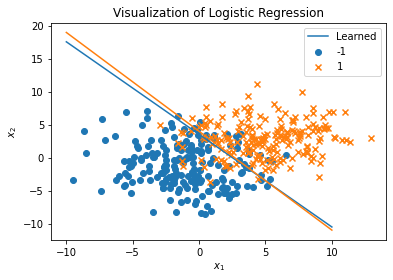

In [566]:
W = net.fc1.weight.data

plt.scatter(class2_x1, class2_x2, marker='o', label='-1')
plt.scatter(class1_x1, class1_x2, marker='x', label='1')
plt.plot(x, -W[0,0]/W[0,1]*x-W[0,2]/W[0,1], label='Learned')
plt.plot(x, x*-1.5 + 4) # This is the line orthogonal to the means of the two classes
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Visualization of Logistic Regression')
plt.legend()

## Support Vector Machine (SVM)
Let's look at another method, called SVM. The idea is simple enough: we maximize the margin from the datapoints to the decision boundary.  

In [556]:
Y[Y==0] = -1

### Pytorch Implementation
Note that we don't have to instantiate a new network class because the forward model structure is identical as before. We just change the loss function: 

In [559]:
optimizer = optim.SGD(net.parameters(), lr=alpha)

optimizer.zero_grad()
for iter in range(10000):
    Fx = net(torch.transpose(X, 0, 1)).squeeze()
    tmp = 1 - Y*Fx
    W = net.fc1.weight.data
    loss = 1/2*torch.norm(W) + torch.sum(torch.nn.functional.relu(tmp))
    loss.backward()
    #print("Loss: %f" %loss)
    optimizer.step()
    optimizer.zero_grad()

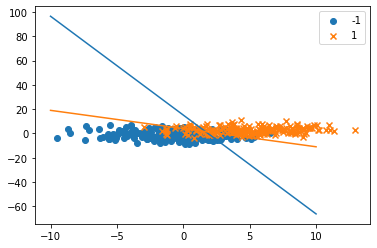

In [560]:
netOutput = net.forward(torch.transpose(X, 0, 1)).detach().numpy()
W = net.fc1.weight.data

plt.scatter(class2_x1, class2_x2, marker='o', label='-1')
plt.scatter(class1_x1, class1_x2, marker='x', label='1')
plt.plot(x, -W[0,0]/W[0,1]*x-W[0,2]/W[0,1])
plt.plot(x, x*-1.5 + 4)
plt.legend()

Generalization of log loss and hinge loss